<a href="https://colab.research.google.com/github/Victoriambaka/INDEPENDENT-PROJECT-13/blob/main/INDEPENDENT_PROJECT_13_Decision_Trees_and_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INDEPENDENT PROJECT 13:Decision Trees and Support Vector Machine

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

Part 2: SVM:

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version.

## Defining the question

Use the healthcare datasets provided to accomplish the following:

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.




## Metric for Success
*    Successfully creating a model that is able to classify whether a patient has hypothyroidism or not, with reliable accuracy.

## Context


*   Since this is an analysis that includes categorising information into two distinct dichotomies, it is a classification problem.

## Experiment design

*    Reading and exploring given dataset
*    Define the appropriateness of the available data to answer the given question.
*    Data Cleaning
*    Exploratory Data Analysis
*    Univariate, Bivariate Analysis, Multivariate Analysis
*    Providing a recommendation based on the analysis. .
*    Challenging the solution by providing insights on how improvements in  the model can be made.
      

### Dataset is available here: http://bit.ly/hypothyroid_data

Dataset Columns

-  Age
-  Sex
-  on_thyroxine
-  query_on_thyroxine
-  on_antithyroid_medicationthyroid_surgery
-  query_hypothyroid
-  query_hyperthyroid
-  pregnant
-  sick
-  tumor
-  lithium
-  goitre
-  TSH_measured
-  TSH
-  T3_measured
-  T3
-  TT4_measured
-  TT4


## Reading data

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline



In [2]:
# Reading the data
url = 'http://bit.ly/hypothyroid_data'
hypothyroid = pd.read_csv(url)

## Data Exploration

In [3]:
# viewing top of the dataset
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [4]:
# Viewing the bottom of the dataset
hypothyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [5]:
# Checking the number of records
hypothyroid.shape

(3163, 26)

In [6]:
# Getting summaries of our data
hypothyroid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,...,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,...,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,...,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,...,2468,695,2914,249,2915,248,2916,247,2903,2903


## Data Appropriateness

In [7]:
# Checking the data types
hypothyroid.dtypes   # All the data needs to be redefined by encoding for it to be suitable type for insight to be derived from it.

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

## Data Preprocessing

In [8]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
 
hypothyroid['status'] = label.fit_transform(hypothyroid['status']) 
print(hypothyroid['status'].unique())

[0 1]


In [9]:
hypothyroid['age'] = label.fit_transform(hypothyroid['age']) 
print(hypothyroid['age'].unique())

[67  6 15 72 81 58 11 34 63 70 46 52 62 43 73 59 19 35 32 80 92 79 57 68
 27 18 40 66 54 25 74 56 69 23 33 65 20 42 51 26 44 13  7 36 30 39  9  8
 84 49 21 37 60 45 47 76 24 29 88 61 38  4 85 55 41 17 50 22 87 77 16 28
 71 83 14 48 82 91 12 90  0 53  5 78  2 10 86  3  1 75 64 31 89]


In [10]:
hypothyroid['sex'] = label.fit_transform(hypothyroid['sex']) 
print(hypothyroid['sex'].unique())

[2 1 0]


In [11]:
hypothyroid['on_thyroxine'] = label.fit_transform(hypothyroid['on_thyroxine']) 
print(hypothyroid['on_thyroxine'].unique())

[0 1]


In [12]:
hypothyroid['query_on_thyroxine'] = label.fit_transform(hypothyroid['query_on_thyroxine']) 
print(hypothyroid['query_on_thyroxine'].unique())

[0 1]


In [13]:
hypothyroid['on_antithyroid_medication'] = label.fit_transform(hypothyroid['on_antithyroid_medication']) 
print(hypothyroid['on_antithyroid_medication'].unique())

[0 1]


In [14]:
hypothyroid['thyroid_surgery'] = label.fit_transform(hypothyroid['thyroid_surgery']) 
print(hypothyroid['thyroid_surgery'].unique())

[0 1]


In [15]:
hypothyroid['query_hypothyroid'] = label.fit_transform(hypothyroid['query_hypothyroid']) 
print(hypothyroid['query_hypothyroid'].unique())

[0 1]


In [16]:
hypothyroid['query_hyperthyroid'] = label.fit_transform(hypothyroid['query_hyperthyroid']) 
print(hypothyroid['query_hyperthyroid'].unique())

[0 1]


In [17]:
hypothyroid['pregnant'] = label.fit_transform(hypothyroid['pregnant']) 
print(hypothyroid['pregnant'].unique())

[0 1]


In [18]:
hypothyroid['sick'] = label.fit_transform(hypothyroid['sick']) 
print(hypothyroid['sick'].unique())

[0 1]


In [19]:
hypothyroid['tumor'] = label.fit_transform(hypothyroid['tumor']) 
print(hypothyroid['tumor'].unique())

[0 1]


In [20]:
hypothyroid['lithium'] = label.fit_transform(hypothyroid['lithium']) 
print(hypothyroid['lithium'].unique())

[0 1]


In [21]:
hypothyroid['goitre'] = label.fit_transform(hypothyroid['goitre']) 
print(hypothyroid['goitre'].unique())

[0 1]


In [22]:
hypothyroid['TSH_measured'] = label.fit_transform(hypothyroid['TSH_measured']) 
print(hypothyroid['TSH_measured'].unique())

[1 0]


In [23]:
hypothyroid['TSH'] = label.fit_transform(hypothyroid['TSH']) 
print(hypothyroid['TSH'].unique())

[134  79   0 158 200  72 204 110 237 163 140  80  81 117 194 121  91 177
 112 179 208 161 207 138 175 230  68  57 176 139 196 180  67 114 221  65
 164 197 213  82 239  94  88  87 116 236 210  96 181  60 111  89 115  83
  69 135  61 119 157  66  62 178 188 108 202  73 193  77 137 218  15  59
 222 160 156 155  86  84 226 159  92 187  95 123 141 143 206 182 198 142
 162  78 189 122 238  25  48  56   9 125  21  39  18  41  51 150  12 171
 144  50  98 104 107  35 153  58 101  33  26  49 103 166  53 105 113 212
 127 165 126  54  47  24  44 170 148  85  99 186 169 201 172  11  76 100
 233 232  52 131 124 106  10 146 120 129   5  97 211 228 130 205 132 216
 229 174 102 133   3   4 118 184  29  43 203 215  75  46  20  93 192 149
 151 154 183 145  74 168 214   6 219 220 199 152  23 190 109 217 224  13
 227  16 128 185  90 223  55 195  71   2  22 231  38  40 147  30  36 167
 234 209  27   1  63 225  31   7  32  34 235  28  70 191  17  64  42  45
  14  19 173 136  37   8]


In [24]:
hypothyroid['T3_measured'] = label.fit_transform(hypothyroid['T3_measured']) 
print(hypothyroid['T3_measured'].unique())

[1 0]


In [25]:
hypothyroid['T3'] = label.fit_transform(hypothyroid['T3']) 
print(hypothyroid['T3'].unique())

[ 7 18  3  5 13 12 14 20 69  9 24 16 29 22  4 23  6  8 11 15 25 26 10 19
  0 30 17 61 35 32 27 28 42 68 41 36 40 47 34 39 45 31 33 37 38 60 51 67
 43 52 55 64 63 44 46 53 62  2  1 49 59 56 48 58 65 54 57 50 21 66]


In [26]:
hypothyroid['TT4_measured'] = label.fit_transform(hypothyroid['TT4_measured']) 
print(hypothyroid['TT4_measured'].unique())

[1 0]


In [27]:
hypothyroid['TT4'] = label.fit_transform(hypothyroid['TT4']) 
print(hypothyroid['TT4'].unique())

[ 55  99 193 219 216 168 213 185 191 233 212 190 266 201 189 247  33  77
  22 209 141  44 177 211 182 178 250   0 214 147 170  11 220 181 183 196
 256 242 197 244 226  66 257 204 133 222 110 123 232  88 227 155 199 109
 176 217 218 235 238 215 195 112 206 142 234 194 224 208 111 223 239 229
 202 205 188 246  10 245 249 248   2 240   4  14 119  12 261 243  24 268
   8 254  96 159  17  15 163  19  71 265 225  32  13   7 263 253   6 258
 228  38 186 102  48  34   9 252 264 260 267 129  58  28  42 103 259  23
   3  78  29  18  45 262  65 251 124 255  57 153  43  59  86  26  41  68
 231 236 115  25  27  63  20   5  39  95 149  35  21   1 134  84  40  92
  61 121 108  60  76  31 144 104 166 143 106 126  54  30 152  36  69 241
  47 230  81  46  62  90  98 221  16 107  52 101  85  82 120  75 237  67
  50 113  91  64 116 122 130 200 127 131  70 175  74  53  73  94 154  80
  49  56  72 105 180  51 198 138 174 117 114  37  89  93 203 151 179 160
 157 192 137 164 156  87 132 100 210 135  79 150 16

In [28]:
hypothyroid['T4U_measured'] = label.fit_transform(hypothyroid['T4U_measured']) 
print(hypothyroid['T4U_measured'].unique())

[1 0]


In [29]:
hypothyroid['T4U'] = label.fit_transform(hypothyroid['T4U']) 
print(hypothyroid['T4U'].unique())

[116  81  68  72  96  87  54  73  89  70  60  97  66  76  69  86  78  95
  51  79  46 107  80  61  67  58  74  36  35  82  48  64  63 114  71  65
  62  77  92  91 121  94 108  85  55  29  38  75 140 113  88  57  52  59
  53 103  50 118  42 138 145  41  45  93 158  56  40   6   0  47  49  39
 150 100  34 135 110 137 147 109 102 132  90  43 141  37 119  44  84  10
  30  22 104 101  98  17 127 142 148 106 111 129 155   5  99  83 125  23
 133  20 153 115  11 149 123   9 134  26  28  27 105 143  32 146  14   1
 144   8 122  15   7 112 124  24 120 156  33  31 152  21  16   4 157 136
 131 117 139 126  25 128   3 154 130   2 151  19  18  13  12]


In [30]:
hypothyroid['FTI_measured'] = label.fit_transform(hypothyroid['FTI_measured']) 
print(hypothyroid['FTI_measured'].unique())

[1 0]


In [31]:
hypothyroid.columns
hypothyroid.head()
hypothyroid.dtypes

status                        int64
age                           int64
sex                           int64
on_thyroxine                  int64
query_on_thyroxine            int64
on_antithyroid_medication     int64
thyroid_surgery               int64
query_hypothyroid             int64
query_hyperthyroid            int64
pregnant                      int64
sick                          int64
tumor                         int64
lithium                       int64
goitre                        int64
TSH_measured                  int64
TSH                           int64
T3_measured                   int64
T3                            int64
TT4_measured                  int64
TT4                           int64
T4U_measured                  int64
T4U                           int64
FTI_measured                  int64
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [32]:
hypothyroid.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [33]:
hypothyroid["TBG"] = hypothyroid['TBG'].fillna((hypothyroid['TBG'].values).mean)

In [34]:
hypothyroid['FTI'] = label.fit_transform(hypothyroid['FTI']) 
print(hypothyroid['FTI'].unique())

[  2  79   0 220 196 137 226 173 238 223 192 248 198 178 257  13  68 200
 129  24 207 201 164 186 222 252 253 142 162 236 206 185  57 269 256 212
 237 233 221 203 118  46 108 110   1 216 167 210  35 195 250 211 228 156
 181 171  39 168 213 255 217 208 218 214 109 231 190 191 209 254 265 268
  16  28 279 272   7 234 105  10   9 245 277 280  27 261  18  29 144  23
  25  42 262  32 260  43 106 276 249  11 258 243 274 271 143  26  12 251
   3 278 244  21  74   6 266   4  31  38  33  50  60  48  95  17   5  30
 273   8  67  97 241  56  20 259  86  70 264  47  15  66  19  81 270 275
 239  41  40  88  14  80 115 235  63  22 246  37  34  49  61 247 151 146
  45  94  65  54  73  36 132 230  84  92  51  78 153  52 179  90  76  59
  62  58 128 135 229  96  75 104 116  44 174  83  53 120  91 100 147 131
 189 125 121  55  71 130 187 199  69 219  98 113  77  89 158 202  93  72
 232 122 182 165 184  82  64 176  87 123 103 101 124 126 160 150 145 170
 267 154 172 111 242 152 138 112 188 148 140 155 19

In [35]:
hypothyroid['TBG_measured'] = label.fit_transform(hypothyroid['TBG_measured']) 
print(hypothyroid['TBG_measured'].unique())

[0 1]


In [36]:
hypothyroid['TBG'] = label.fit_transform(hypothyroid['TBG']) 
print(hypothyroid['TBG'].unique())

[52 21 28  0 12 24 18 39 33 25  9 14 31 34 20 23 32  1 13 30 10 16 29 26
 43 51  8 19 27 35  3 15 36 42 49 38 22  6 17 11 37 50 40 47 41  2  4  7
 44 46 48 45  5]


## Data Cleaning

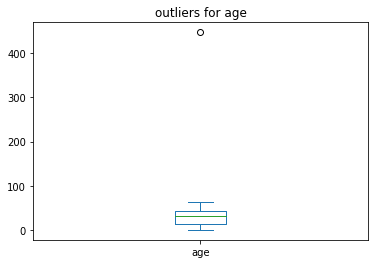

In [37]:
# Finding outliers in the dataset.

hypothyroid['age'].value_counts().plot.box(title='outliers for age');

In [38]:
for x in ['age']:
    q75,q25 = np.percentile(hypothyroid.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    hypothyroid.loc[hypothyroid[x] < min,x] = np.nan
    hypothyroid.loc[hypothyroid[x] > max,x] = np.nan

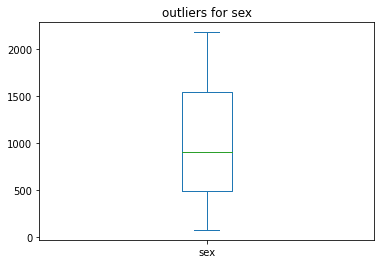

In [39]:
# Finding outliers in the dataset.

hypothyroid['sex'].value_counts().plot.box(title='outliers for sex');

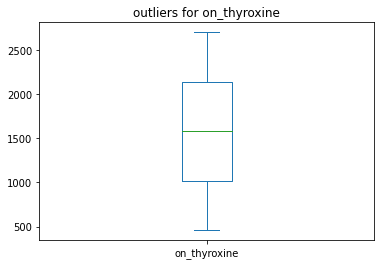

In [40]:
# Finding outliers in the dataset.

hypothyroid['on_thyroxine'].value_counts().plot.box(title='outliers for on_thyroxine');

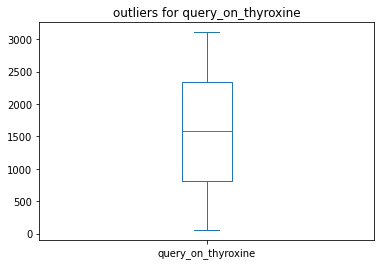

In [41]:
# Finding outliers in the dataset.

hypothyroid['query_on_thyroxine'].value_counts().plot.box(title='outliers for query_on_thyroxine');

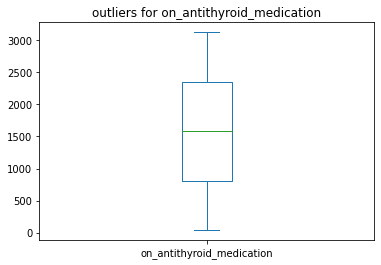

In [42]:
# Finding outliers in the dataset.

hypothyroid['on_antithyroid_medication'].value_counts().plot.box(title='outliers for on_antithyroid_medication');

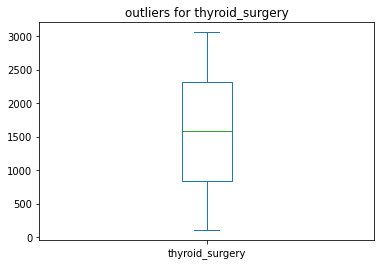

In [43]:
# Finding outliers in the dataset.

hypothyroid['thyroid_surgery'].value_counts().plot.box(title='outliers for thyroid_surgery');

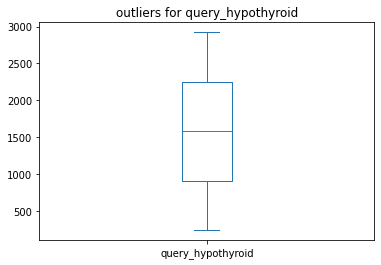

In [44]:
# Finding outliers in the dataset.

hypothyroid['query_hypothyroid'].value_counts().plot.box(title='outliers for query_hypothyroid');

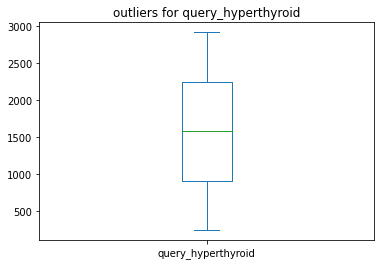

In [45]:
# Finding outliers in the dataset.

hypothyroid['query_hyperthyroid'].value_counts().plot.box(title='outliers for query_hyperthyroid');

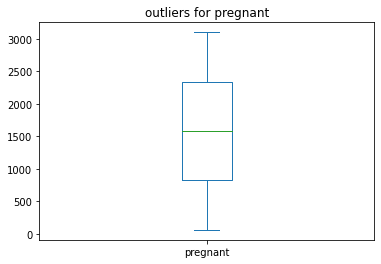

In [46]:
# Finding outliers in the dataset.

hypothyroid['pregnant'].value_counts().plot.box(title='outliers for pregnant');

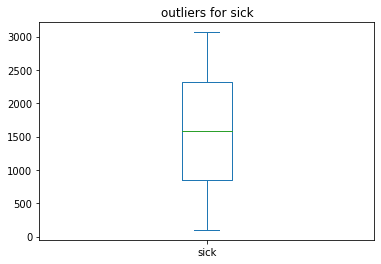

In [47]:
# Finding outliers in the dataset.

hypothyroid['sick'].value_counts().plot.box(title='outliers for sick');

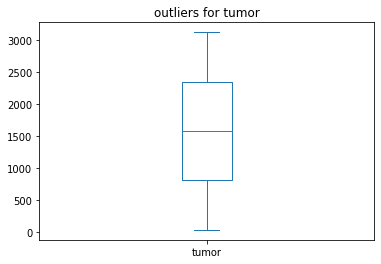

In [48]:
# Finding outliers in the dataset.

hypothyroid['tumor'].value_counts().plot.box(title='outliers for tumor');

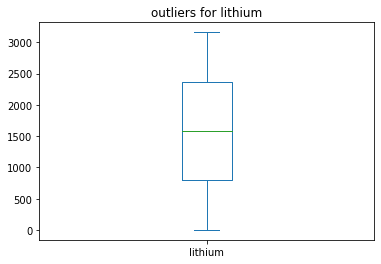

In [49]:
# Finding outliers in the dataset.

hypothyroid['lithium'].value_counts().plot.box(title='outliers for lithium');

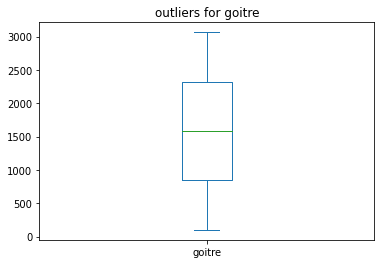

In [50]:
# Finding outliers in the dataset.

hypothyroid['goitre'].value_counts().plot.box(title='outliers for goitre');

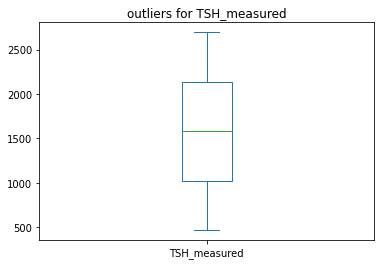

In [51]:
# Finding outliers in the dataset.

hypothyroid['TSH_measured'].value_counts().plot.box(title='outliers for TSH_measured');

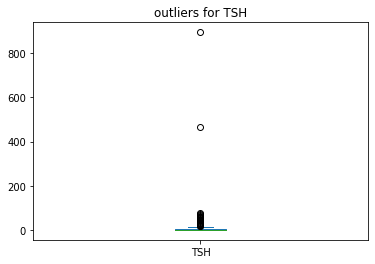

In [52]:
# Finding outliers in the dataset.

hypothyroid['TSH'].value_counts().plot.box(title='outliers for TSH');

In [53]:
for x in ['TSH']:
    q90,q25 = np.percentile(hypothyroid.loc[:,x],[90,25])
    intr_qr = q90-q25
 
    max = q90+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    hypothyroid.loc[hypothyroid[x] < min,x] = np.nan
    hypothyroid.loc[hypothyroid[x] > max,x] = np.nan

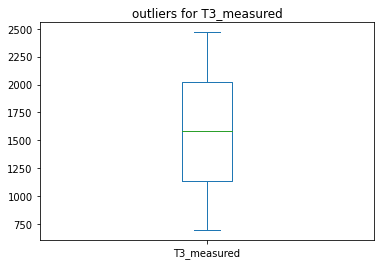

In [54]:
# Finding outliers in the dataset.

hypothyroid['T3_measured'].value_counts().plot.box(title='outliers for T3_measured');

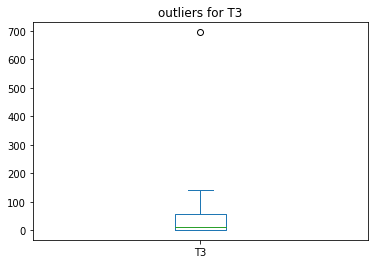

In [55]:
# Finding outliers in the dataset.

hypothyroid['T3'].value_counts().plot.box(title='outliers for T3');

In [56]:
for x in ['T3']:
    q75,q25 = np.percentile(hypothyroid.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    hypothyroid.loc[hypothyroid[x] < min,x] = np.nan
    hypothyroid.loc[hypothyroid[x] > max,x] = np.nan

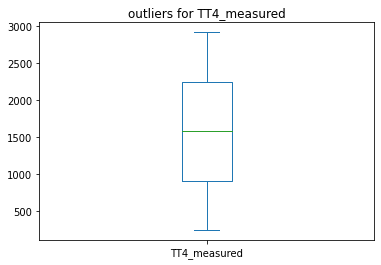

In [57]:
# Finding outliers in the dataset.

hypothyroid['TT4_measured'].value_counts().plot.box(title='outliers for TT4_measured');

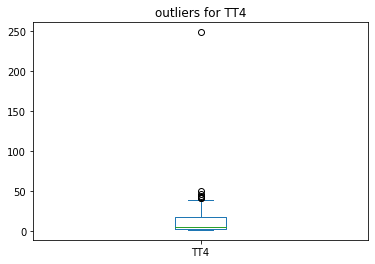

In [58]:
# Finding outliers in the dataset.

hypothyroid['TT4'].value_counts().plot.box(title='outliers for TT4');

In [59]:
for x in ['TT4']:
    q99,q25 = np.percentile(hypothyroid.loc[:,x],[99,25])
    intr_qr = q99-q25
 
    max = q99+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    hypothyroid.loc[hypothyroid[x] < min,x] = np.nan
    hypothyroid.loc[hypothyroid[x] > max,x] = np.nan

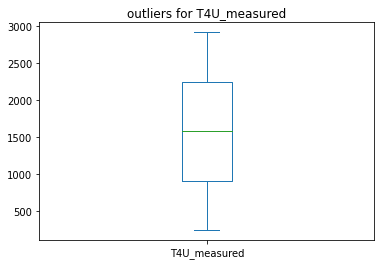

In [60]:
# Finding outliers in the dataset.

hypothyroid['T4U_measured'].value_counts().plot.box(title='outliers for T4U_measured');

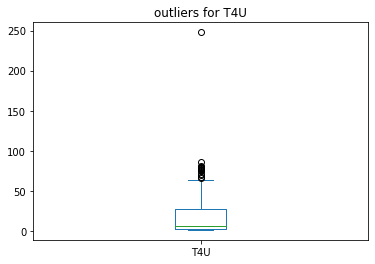

In [61]:
# Finding outliers in the dataset.

hypothyroid['T4U'].value_counts().plot.box(title='outliers for T4U');

In [62]:
for x in ['T4U']:
    q99,q25 = np.percentile(hypothyroid.loc[:,x],[99,25])
    intr_qr = q99-q25
 
    max = q99+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    hypothyroid.loc[hypothyroid[x] < min,x] = np.nan
    hypothyroid.loc[hypothyroid[x] > max,x] = np.nan

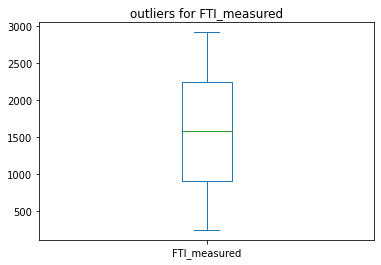

In [63]:
# Finding outliers in the dataset.

hypothyroid['FTI_measured'].value_counts().plot.box(title='outliers for FTI_measured');

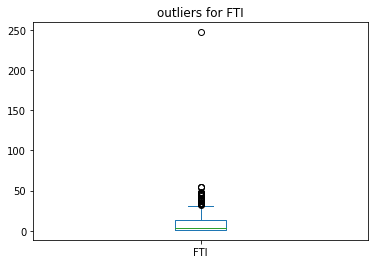

In [64]:
# Finding outliers in the dataset.

hypothyroid['FTI'].value_counts().plot.box(title='outliers for FTI');

In [65]:
for x in ['FTI']:
    q99,q25 = np.percentile(hypothyroid.loc[:,x],[99,25])
    intr_qr = q99-q25
 
    max = q99+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    hypothyroid.loc[hypothyroid[x] < min,x] = np.nan
    hypothyroid.loc[hypothyroid[x] > max,x] = np.nan

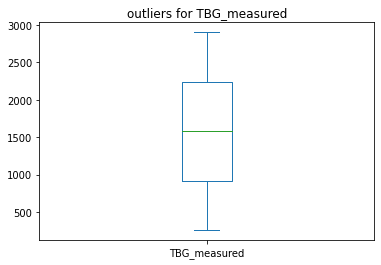

In [66]:
# Finding outliers in the dataset.

hypothyroid['TBG_measured'].value_counts().plot.box(title='outliers for TBG_measured');

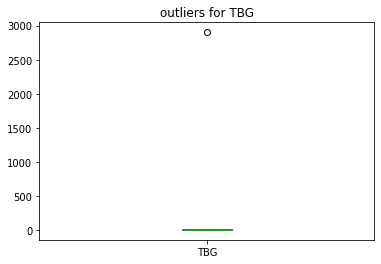

In [67]:
# Finding outliers in the dataset.

hypothyroid['TBG'].value_counts().plot.box(title='outliers for TBG');

In [68]:
for x in ['TBG']:
    q75,q25 = np.percentile(hypothyroid.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    hypothyroid.loc[hypothyroid[x] < min,x] = np.nan
    hypothyroid.loc[hypothyroid[x] > max,x] = np.nan

In [69]:
# Finding anomalies in the data
hypothyroid.duplicated().sum()  # There are 77 duplicates.

152

In [70]:
# Dropping the duplicates
hypothyroid = hypothyroid.drop_duplicates()

In [71]:
# confirming dropped duplicates
hypothyroid.duplicated().sum()

0

In [72]:
# Finding and dealing with null values.
hypothyroid.isnull().sum()   # There are no null values

status                         0
age                            0
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                            0
T3_measured                    0
T3                             0
TT4_measured                   0
TT4                            0
T4U_measured                   0
T4U                            0
FTI_measured                   0
FTI                            0
TBG_measured                   0
TBG                          176
dtype: int64

In [73]:
# hypothyroid['TBG'].fillna(0)

## Exploratory Data Analysis

### Univariate Analysis

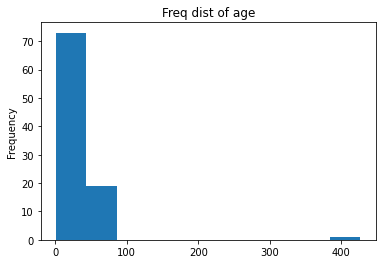

In [74]:
# Plotting univariate graphs and recording their observations

hypothyroid['age'].value_counts().plot.hist(title='Freq dist of age');

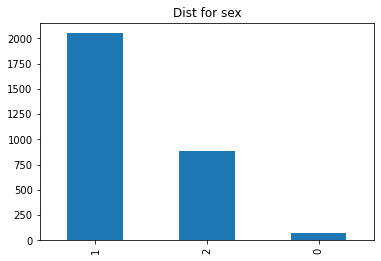

In [75]:
hypothyroid['sex'].value_counts().plot.bar(title='Dist for sex');


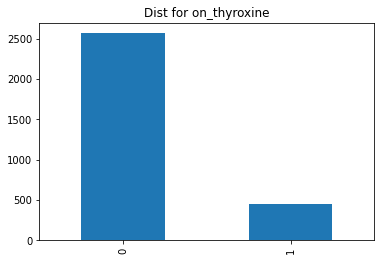

In [76]:
hypothyroid['on_thyroxine'].value_counts().plot.bar(title='Dist for on_thyroxine');


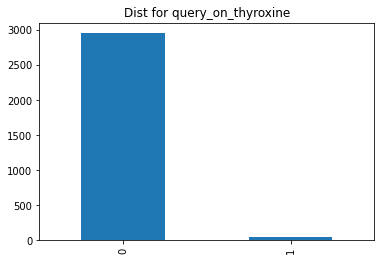

In [77]:
hypothyroid['query_on_thyroxine'].value_counts().plot.bar(title='Dist for query_on_thyroxine');


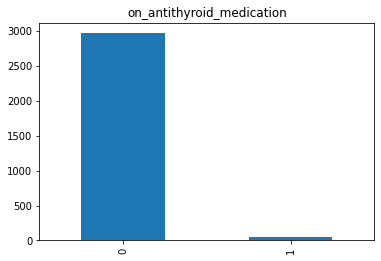

In [78]:
hypothyroid['on_antithyroid_medication'].value_counts().plot.bar(title='on_antithyroid_medication');


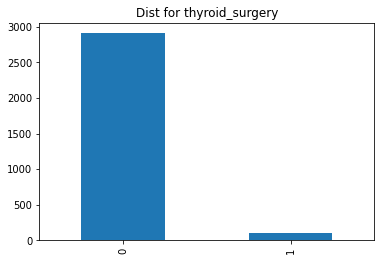

In [79]:
hypothyroid['thyroid_surgery'].value_counts().plot.bar(title='Dist for thyroid_surgery');


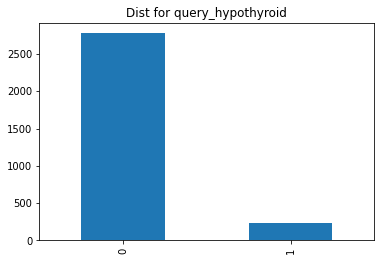

In [80]:
hypothyroid['query_hypothyroid'].value_counts().plot.bar(title='Dist for query_hypothyroid');

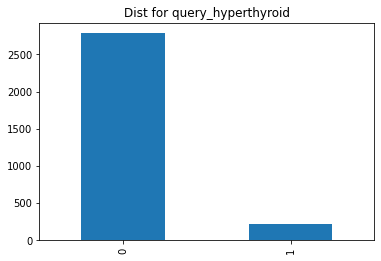

In [81]:
hypothyroid['query_hyperthyroid'].value_counts().plot.bar(title='Dist for query_hyperthyroid');


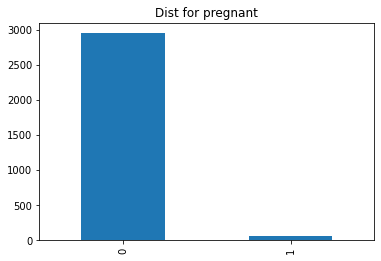

In [82]:
hypothyroid['pregnant'].value_counts().plot.bar(title='Dist for pregnant');


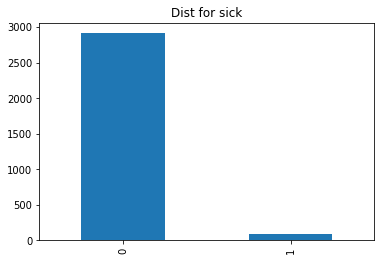

In [83]:
hypothyroid['sick'].value_counts().plot.bar(title='Dist for sick');


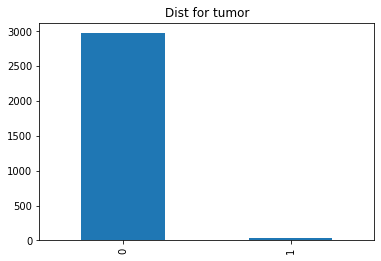

In [84]:
hypothyroid['tumor'].value_counts().plot.bar(title='Dist for tumor');


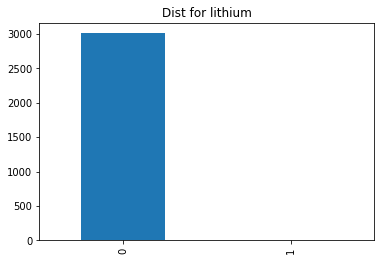

In [85]:
hypothyroid['lithium'].value_counts().plot.bar(title='Dist for lithium');


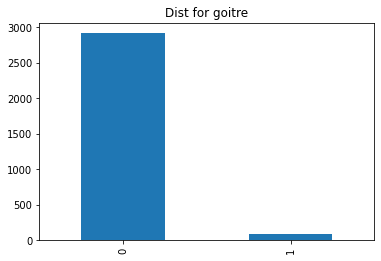

In [86]:
hypothyroid['goitre'].value_counts().plot.bar(title='Dist for goitre');


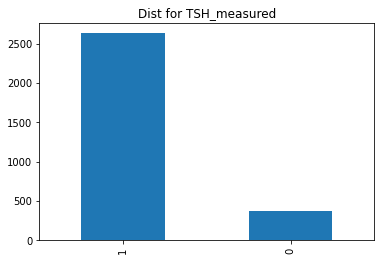

In [87]:
hypothyroid['TSH_measured'].value_counts().plot.bar(title='Dist for TSH_measured');


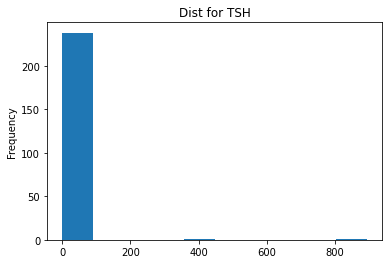

In [88]:
hypothyroid['TSH'].value_counts().plot.hist(title='Dist for TSH');


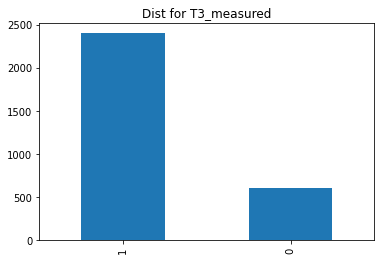

In [89]:
hypothyroid['T3_measured'].value_counts().plot.bar(title='Dist for T3_measured');


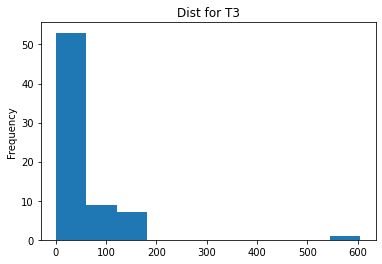

In [90]:
hypothyroid['T3'].value_counts().plot.hist(title='Dist for T3');


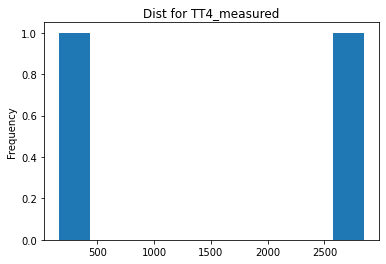

In [91]:
hypothyroid['TT4_measured'].value_counts().plot.hist(title='Dist for TT4_measured');


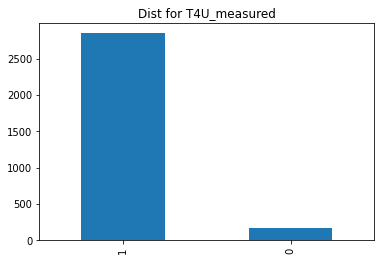

In [92]:
hypothyroid['T4U_measured'].value_counts().plot.bar(title='Dist for T4U_measured');


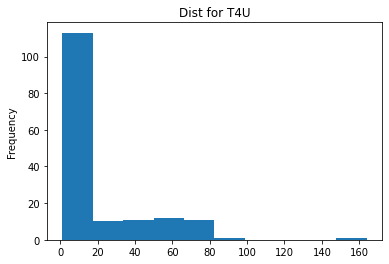

In [93]:
hypothyroid['T4U'].value_counts().plot.hist(title='Dist for T4U');


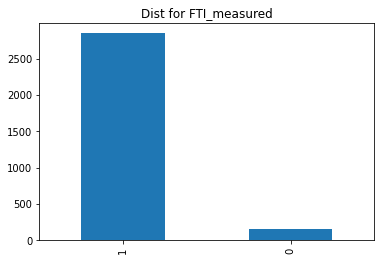

In [94]:
hypothyroid['FTI_measured'].value_counts().plot.bar(title='Dist for FTI_measured');


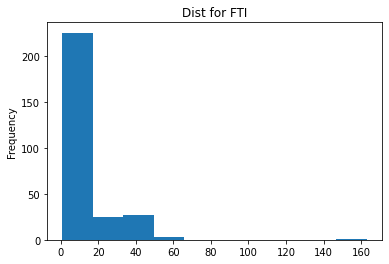

In [95]:
hypothyroid['FTI'].value_counts().plot.hist(title='Dist for FTI');


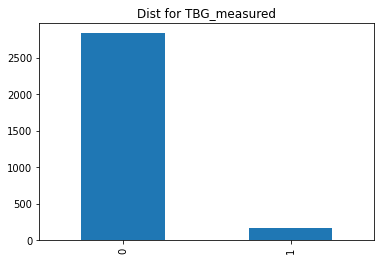

In [96]:
hypothyroid['TBG_measured'].value_counts().plot.bar(title='Dist for TBG_measured');


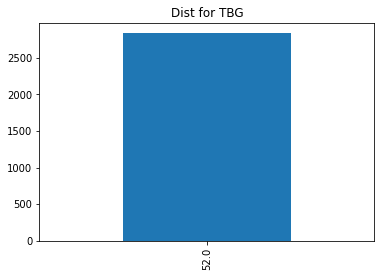

In [97]:
hypothyroid['TBG'].value_counts().plot.bar(title='Dist for TBG');


### Bivariate Analysis

In [98]:
y = hypothyroid['status'].values

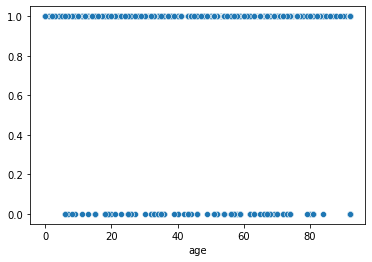

In [99]:
# Plotting bargraph to show how hypothyroid relates to age.
sns.scatterplot(x = hypothyroid['age'], y = y)

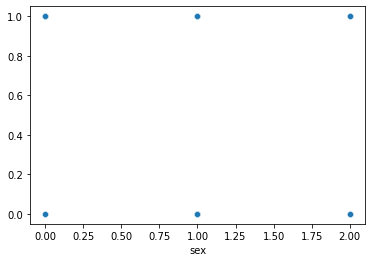

In [100]:
# Plotting bargraph to show how hypothyroidism relates to the sex.
sns.scatterplot(x = hypothyroid['sex'], y = y)

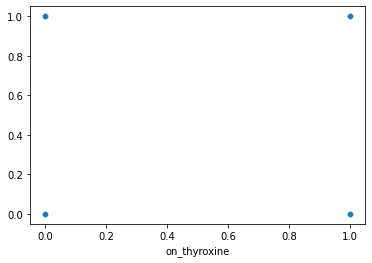

In [101]:
# Plotting bargraph to show how being on thyroxine relaes to the status of hypothyroidism.
sns.scatterplot(x = hypothyroid['on_thyroxine'], y = y)

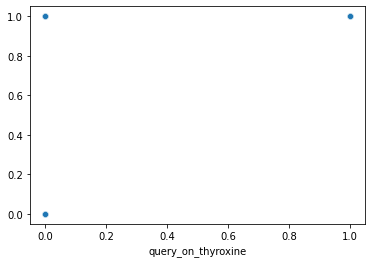

In [102]:
# Plotting bargraph to show how query on thyroxine relates to the status.
sns.scatterplot(x = hypothyroid['query_on_thyroxine'], y = y)

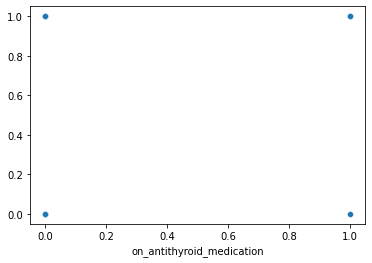

In [103]:
# Plotting bargraph to show how being on antithyroid medication relates to the status of hypothyroidism.
sns.scatterplot(x = hypothyroid['on_antithyroid_medication'], y = y)

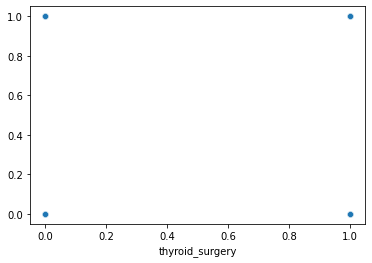

In [104]:
# Plotting bargraph to show how having thyroid surgery relates to the status of hypothyroidism.
sns.scatterplot(x = hypothyroid['thyroid_surgery'], y = y)

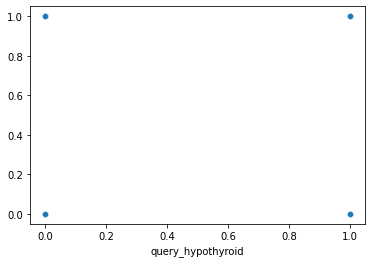

In [105]:
# Plotting bargraph to show how query_hypothyroid relates to the status of hypothyroidism.
sns.scatterplot(x = hypothyroid['query_hypothyroid'], y = y)

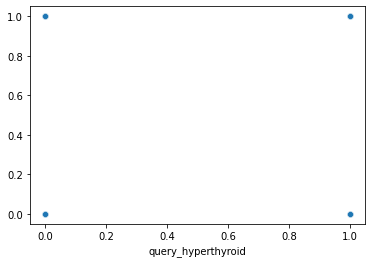

In [106]:
# Plotting bargraph to show how query_hypothyroid relates to the status.
sns.scatterplot(x = hypothyroid['query_hyperthyroid'], y = y)

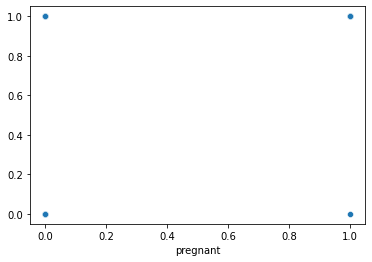

In [107]:
# Plotting bargraph to show pregnancy vs hypothyroidism.
sns.scatterplot(x = hypothyroid['pregnant'], y = y)

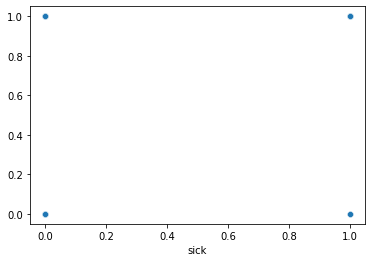

In [108]:
# Plotting bargraph to show sick vs hypothyroidism.
sns.scatterplot(x = hypothyroid['sick'], y = y)

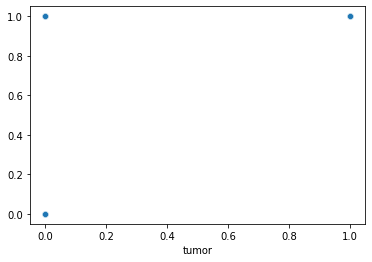

In [109]:
# Plotting bargraph of tumor vs hypothyroidism.
sns.scatterplot(x = hypothyroid['tumor'], y = y)

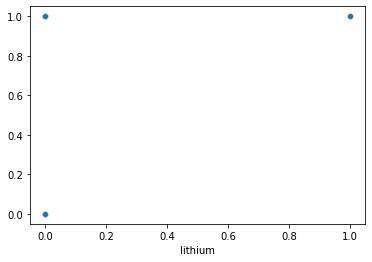

In [110]:
# Plotting bargraph of lithium vs hypothyroidism.
sns.scatterplot(x = hypothyroid['lithium'], y = y)

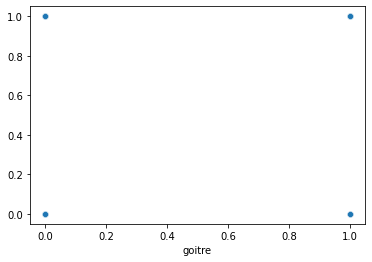

In [111]:
# Plotting bargraph to show how goitre relates to hypothyroidism.
sns.scatterplot(x = hypothyroid['goitre'], y = y)

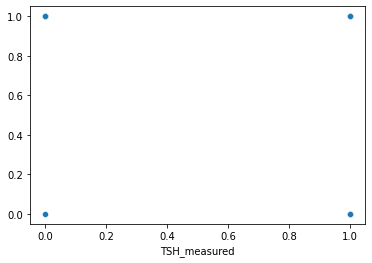

In [112]:
# Plotting bargraph of TSH measured vs hypothyroidism.
sns.scatterplot(x = hypothyroid['TSH_measured'], y = y)

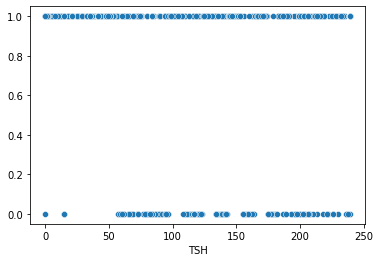

In [113]:
# Plotting bargraph of TSH vs hypothyroidism.
sns.scatterplot(x = hypothyroid['TSH'], y = y)

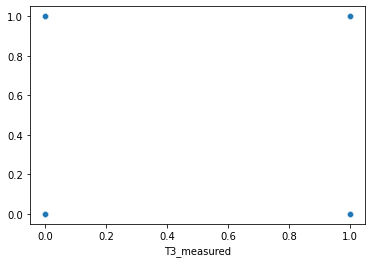

In [114]:
# Plotting bargraph of T3 measured vs hypothyroidism.
sns.scatterplot(x = hypothyroid['T3_measured'], y = y)

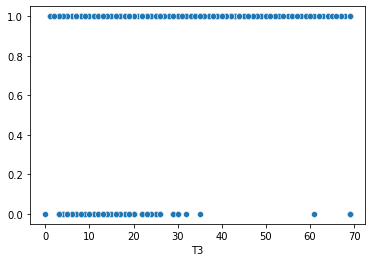

In [115]:
# Plotting bargraph of T3 vs hypothyroidism.
sns.scatterplot(x = hypothyroid['T3'], y = y)

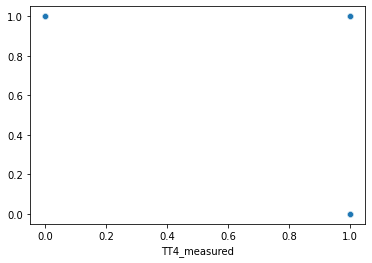

In [116]:
# Plotting bargraph of TT4 measured vs hypotnyroidism.
sns.scatterplot(x = hypothyroid['TT4_measured'], y = y)

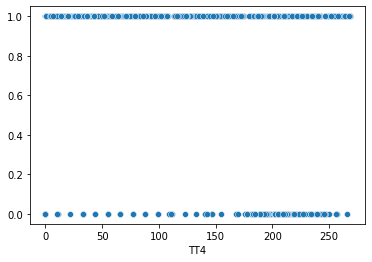

In [117]:
# Plotting bargraph of TT4 vs hypothyroidism.
sns.scatterplot(x = hypothyroid['TT4'], y = y)

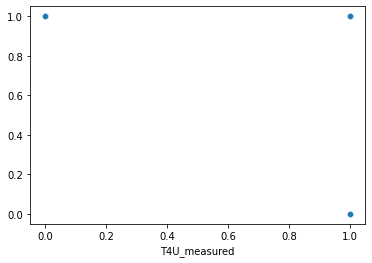

In [118]:
# Plotting bargraph of T4U_measured vs hypothyroidism.
sns.scatterplot(x = hypothyroid['T4U_measured'], y = y)

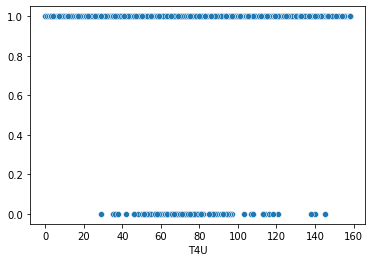

In [119]:
# Plotting bargraph of T4U vs hypothyroidism.
sns.scatterplot(x = hypothyroid['T4U'], y = y)

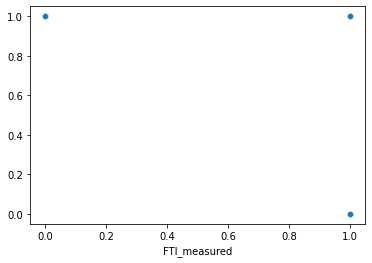

In [120]:
# Plotting bargraph of FTI_measured vs hypothyroidism.
sns.scatterplot(x = hypothyroid['FTI_measured'], y = y)

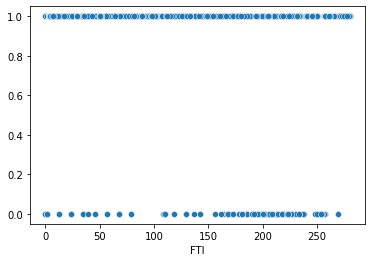

In [121]:
# Plotting bargraph of FTI vs hypothyroidism.
sns.scatterplot(x = hypothyroid['FTI'], y = y)

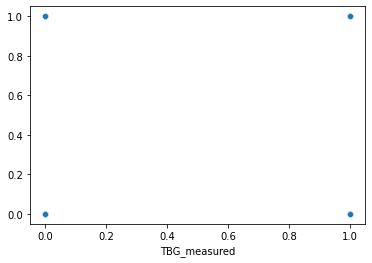

In [122]:
# Plotting bargraph of TBG_measured vs hypothyroidism.
sns.scatterplot(x = hypothyroid['TBG_measured'], y = y)

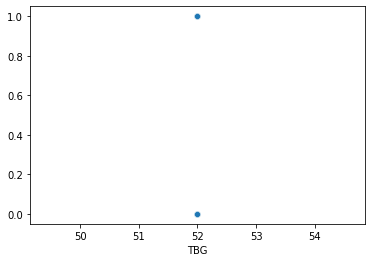

In [123]:
# Plotting bargraph of TBG vs hypothyroidism.
sns.scatterplot(x = hypothyroid['TBG'], y = y)

### Multivariate Analysis.

In [124]:
# Below are multivariate plots for the dataset. Showing how each variable is correlated to the others.
# sns.pairplot(hypothyroid)

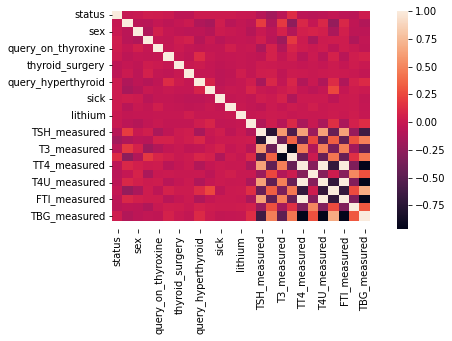

In [125]:
# Below is a heatmap showing the correlations between each value and all other values in the dataset.
sns.heatmap(hypothyroid.corr())
plt.show()

### Data Reduction : LDA

In [126]:
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [127]:
# Assigning X and y
#
X = hypothyroid[['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']].values
y = hypothyroid['status'].values

In [128]:
# The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [129]:
# Step 5: Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [131]:
# Peforming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


ValueError: ignored

In [132]:
# Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

ValueError: ignored

## Classification Analysis

*    Decision Trees
     - Ada Boost
     - Random Forest
*    Support Vector Machine

### Decision Trees

In [156]:
# Splitting the independent and dependent variables
from sklearn.model_selection import train_test_split # 

test_features = [ 'T3','TT4','T4U', 'TSH']
y = hypothyroid['status'].values

X = hypothyroid[test_features].values

In [134]:
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=4)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()


,Actual,Predicted
count,904.000000,904.000000
mean,0.961283,0.952024
std,0.193026,0.119079
min,0.000000,0.080028
25%,1.000000,0.969694
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [135]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Root Mean Squared Error: 0.15808320577225518 is near less than 10% of the actual arithmetic mean

Mean Absolute Error: 0.056500305484960836
Mean Squared Error: 0.024990299947233174
Root Mean Squared Error: 0.15808320577225518


In [136]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ValueError: ignored

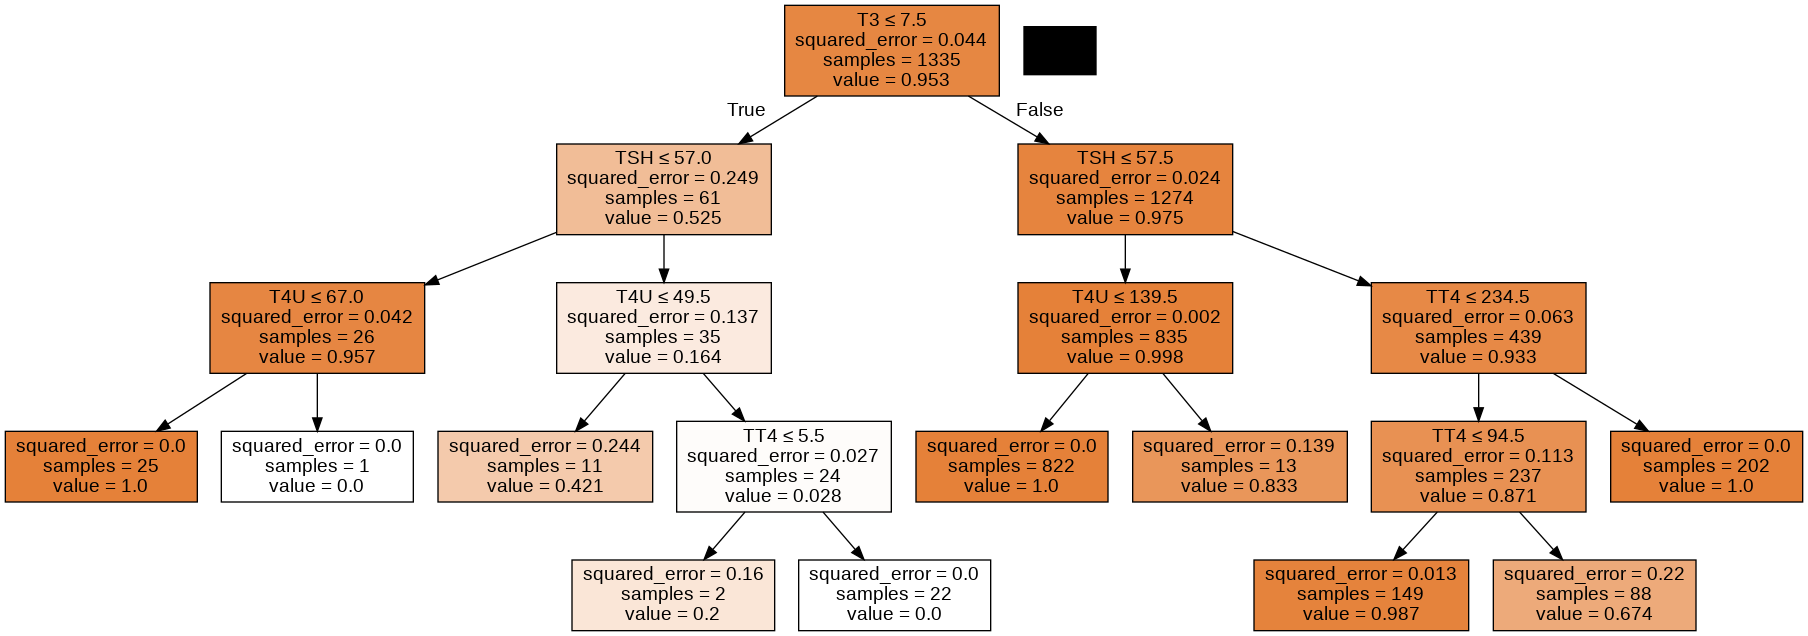

In [137]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=False,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('status_forest.png')
Image(graph.create_png())


In [138]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('T3', 0.37), ('TT4', 0.22), ('T4U', 0.08), ('TSH', 0.33)]

Variable: T3                   Importance: 0.37
Variable: TSH                  Importance: 0.33
Variable: TT4                  Importance: 0.22
Variable: T4U                  Importance: 0.08


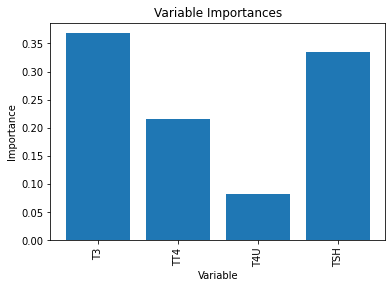

In [139]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


### Support Vector Machine

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


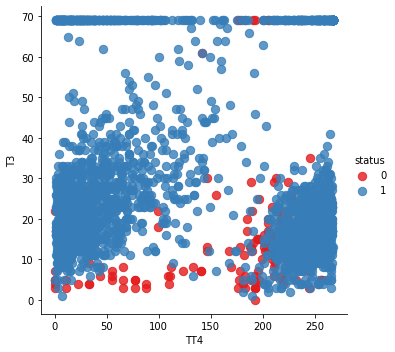

In [ ]:
# We are going to use Flour and Butter as our classifying criteria. So we plot the two columns to see if we can apply svm on them
# Plot two ingredients
sns.lmplot('TT4', 'T3', data=hypothyroid, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

**Fit the Model**

In [140]:
# Specify the input for the model
from sklearn.svm import SVC,LinearSVC
tt4_t3 = hypothyroid[['TT4', 'T3']].to_numpy()
# Put a label to status, assign it 0 or 1
type_label = np.where(hypothyroid['status']=='hypothyroid',0,1)


# Fit the model
model = SVC(kernel= 'linear')
model.fit(tt4_t3,type_label)

ValueError: ignored

**Results Visualization**


In [141]:
# Get the separating hyperplane
w = model.coef_[0]  #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane. We achieve this by creating a range numbers from the largest number of the butter vlaues and the smallest number of the butter values.  
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the hyperplane
sns.lmplot('TT4', 'T3', data=hypothyroid, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');



AttributeError: ignored

In [142]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Look at the margins and support vectors
sns.lmplot('TT4', 'T3', data=hypothyroid, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--') #'k--' indicates that we want to draw a black dotted line
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=80, facecolors='none');


AttributeError: ignored

**Prediction and Evaluation**


In [143]:
# Now that we have created our model let's use it to make some predictions.
# Remember the output of our model can either be 0 or 1. 0 being a muffin and 1 being a cupcake as we set it in the type_label variable.
# Predict if 60 parts flour and 30 parts butter
muffin_or_cupcake = model.predict([[60, 30]])
muffin_or_cupcake

AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


NameError: ignored

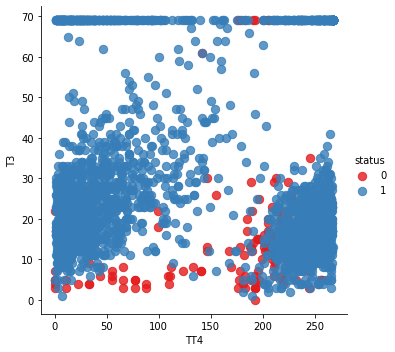

In [146]:
# Plot the point to visually see where the point lies
sns.lmplot('TT4', 'T3', data=hypothyroid, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(41, 30, 'yo', markersize='9');

In [147]:
# We can also go an exra mile to create a function that helps us predict when recipe is muffin or cupcake

def positive_or_negative(TT4, T3):
    if(model.predict([[TT4, T3]]))==0:
        print('Hypothyroid positive')
    else:
        print('Hypothyroid negative')

# Predict if 60 parts flour and 30 parts butter
positive_or_negative(60, 30)

AttributeError: ignored

## Challenging the solution by providing insights on how improvements in model can be made.

In [148]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# We will set its max_depth to 4
tree = DecisionTreeRegressor(max_depth=4)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained, note that we apply it to the whole data set this time
y_pred_tree = tree.predict(X)

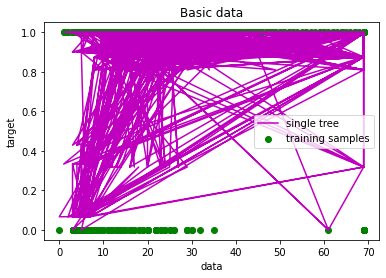

In [154]:
# Let's visualize what the data looks like
# Plot the results
X = hypothyroid[['T3']].values
plt.figure()
plt.scatter(X, y, c="g", label="training samples")
plt.plot(X, y_pred_tree, c="m", label="single tree")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()


ValueError: ignored

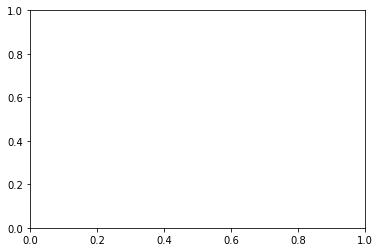

In [157]:
from sklearn.ensemble import AdaBoostRegressor

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=True)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X)

# 
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_tree, c="r", label="single tree", linewidth=2)
plt.plot(X, y_pred_ada, c="g", label="ada 300", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()




## Recommendation

In [158]:
# I think the decision trees worked better in my case.
# For now its decision trees.